In [1]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt

from datetime import datetime

from tensorflow import keras
from keras import layers
from keras import models
from keras import callbacks
import pandas as pd

#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Conv2D, Flatten
#from tensorflow.keras.callbacks import ModelCheckpoint

from data_tools import load_preprocessed, dataPrep, nameModel

simPrefix = "D:\icecube\sim_data"

In [2]:

x, y = load_preprocessed(simPrefix, 'train')



Percentage of events with a NaN: 2.68


In [3]:
prep = { 't':None, 'normed':False}
x_i = dataPrep(x, y, **prep)


In [8]:
del x_i

In [7]:
all_data = pd.DataFrame(x_i.flatten())

In [21]:
print(type(x_i))
time_data = pd.DataFrame(x_i.flatten())

<class 'numpy.ndarray'>


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

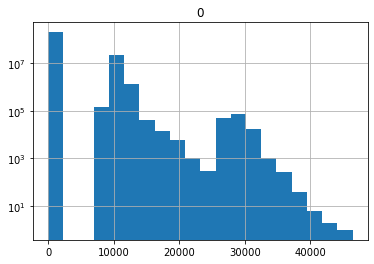

In [8]:
all_data.hist(bins = 20, log = True )

In [ ]:
time_data = pd.DataFrame(x_i.flatten())


In [23]:
del x_i_test

In [24]:

x_i_test = x_i.copy()

In [25]:
def shift(x, shift_to = 0):
    
    for idx1, event in enumerate(x): #this spits out 10 by 10
        #find minumum of event
        #print(event)
        curMin = 10000000
        for idx2, column in enumerate(event):
            #print (row)
            for idx3, row in enumerate(column):
                #print (column[2:])
                for idx4, point in enumerate(row[2:]):
                    if (point == 0):
                        x[idx1,idx2,idx3,idx4+2] = -1
                    elif (point < curMin):
                        curMin = point
        for idx2, column in enumerate(event):
            #print (row)
            for idx3, row in enumerate(column):
                #print (column[2:])
                for idx4, point in enumerate(row[2:]):
                    if (x[idx1,idx2,idx3,idx4+2] != -1):
                        x[idx1,idx2,idx3,idx4+2] = x[idx1,idx2,idx3,idx4+2] - curMin#apply shift
 
        break #for debugging

In [26]:
shift(x_i_test)

In [ ]:
arr = [9 , 2, 5 ,4 ,1]

In [ ]:
arr = np.array(arr)

In [ ]:
df = pd.DataFrame(arr)
      

In [30]:
print(df.dtypes)

0    int32
dtype: object


In [11]:
print(x_i_test[0][4])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.20098838e-01 2.58847747e-01 1.00130000e+04 9.99300000e+03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.13681899e-01 1.53814641e-01 9.88000000e+03 9.88400000e+03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]]


In [27]:
print(x_i_test[0][4])

[[ 0.00000000e+00  0.00000000e+00 -1.00000000e+00 -1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.00000000e+00 -1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.00000000e+00 -1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.00000000e+00 -1.00000000e+00]
 [ 1.20098838e-01  2.58847747e-01  1.54000000e+02  1.34000000e+02]
 [ 0.00000000e+00  0.00000000e+00 -1.00000000e+00 -1.00000000e+00]
 [ 1.13681899e-01  1.53814641e-01  2.10000000e+01  2.50000000e+01]
 [ 0.00000000e+00  0.00000000e+00 -1.00000000e+00 -1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.00000000e+00 -1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.00000000e+00 -1.00000000e+00]]


In [8]:
print(x[0,0, 0, 2:]) #first event, first column

[0. 0.]
